In [ ]:
# Import libraries
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 682.7 kB/s eta 0:03:03
   ---------------------------------------- 0.1/124.9 MB 656.4 kB/s eta 0:03:11
   ---------------------------------------- 0.1/124.9 MB 1.2 MB/s eta 0:01:43
   ---------------------------------------- 0.4/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 0.9/124.9 MB 4.5 MB/s eta 0:00:28
    --------------------------------------- 2.1/124.9 MB 8.2 MB/s eta 0:00:15
   - -------------------------------------- 4.5/124.9 MB 14.4 MB/s eta 0:00:09
   -- ------------------------------------- 6.4/124.9 MB 18.7 MB/s eta 0:00:07
   --- ---------

In [ ]:
# Load dataset
file_path = 'final_combined_air_pollution_data.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Inspect data
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                1005 non-null   object 
 1   County                               1005 non-null   object 
 2   Year                                 1005 non-null   float64
 3   Days with AQI                        1005 non-null   float64
 4   Good Days                            1005 non-null   float64
 5   Moderate Days                        1005 non-null   float64
 6   Unhealthy for Sensitive Groups Days  1005 non-null   float64
 7   Unhealthy Days                       1005 non-null   float64
 8   Very Unhealthy Days                  1005 non-null   float64
 9   Hazardous Days                       1005 non-null   float64
 10  Max AQI                              1005 non-null   float64
 11  90th Percent

In [ ]:
data_copy = data.copy()

# Select numerical columns for features
features = data_copy.select_dtypes(include=['float64']).drop(columns=['Year'])  # Drop irrelevant columns like 'Year'
target = data_copy['Good Days']  # Set your target variable here

# Handle missing values (if necessary)
features.fillna(features.mean(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training and test sets prepared!")

Training and test sets prepared!


In [ ]:
# Define machine learning models
models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

In [ ]:
# Train and evaluate each model
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    results.append((name, rmse, r2))
    print(f"{name}: RMSE = {rmse:.2f}, R^2 = {r2:.2f}")

# Display results
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R^2'])
print("\nModel Performance:\n", results_df)


Training Gradient Boosting...
Gradient Boosting: RMSE = 0.75, R^2 = 1.00
Training Random Forest...
Random Forest: RMSE = 1.10, R^2 = 1.00
Training Support Vector Regression...
Support Vector Regression: RMSE = 74.69, R^2 = -0.00
Training K-Nearest Neighbors...
K-Nearest Neighbors: RMSE = 35.59, R^2 = 0.77
Training Neural Network...
Neural Network: RMSE = 14.62, R^2 = 0.96
Training XGBoost...
XGBoost: RMSE = 1.91, R^2 = 1.00

Model Performance:
                        Model       RMSE       R^2
0          Gradient Boosting   0.749193  0.999899
1              Random Forest   1.096813  0.999784
2  Support Vector Regression  74.689506 -0.003016
3        K-Nearest Neighbors  35.589869  0.772259
4             Neural Network  14.620087  0.961568
5                    XGBoost   1.905463  0.999347


In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Grid search
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best parameters for Gradient Boosting:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best RMSE: 1.4650097487103115


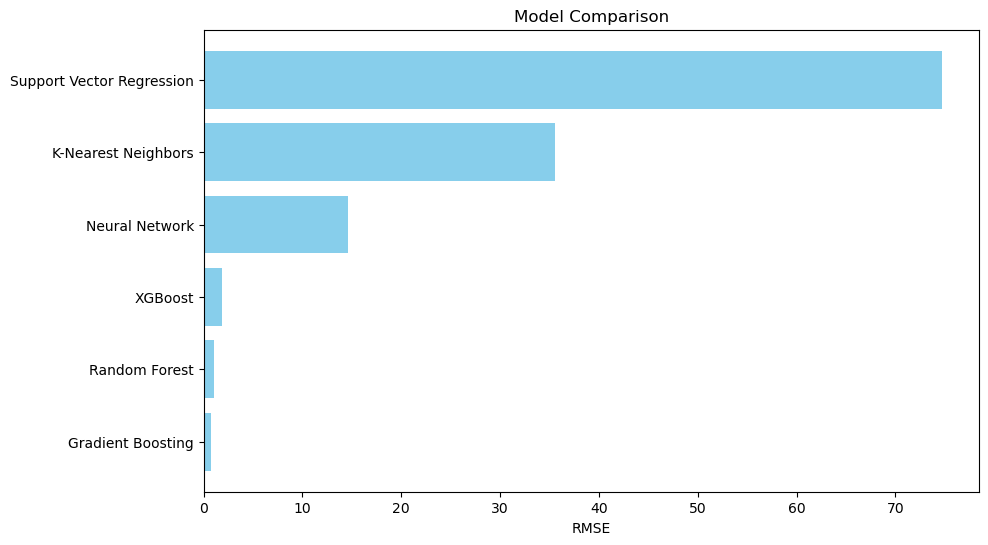

In [ ]:
# Sort results by RMSE
results_df = results_df.sort_values(by='RMSE')

# Bar plot for RMSE
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.title('Model Comparison')
plt.show()

In [ ]:
# Save the results to a CSV file
results_df.to_csv('model_performance_results.csv', index=False)
print("Model performance results saved to 'model_performance_results.csv'")

Model performance results saved to 'model_performance_results.csv'


In [ ]:
pollution_features = ['Days PM2.5', 'Days PM10', 'Days Ozone', 'Days NO2']
health_metrics = ['Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days']
analysis_data = data_copy[pollution_features + health_metrics]

# Check for missing values and handle them
analysis_data = analysis_data.dropna()
print("Dataset prepared for pollution and health analysis!")

Dataset prepared for pollution and health analysis!


Correlation Matrix:
                      Days PM2.5  Days PM10  Days Ozone  Days NO2  \
Days PM2.5             1.000000  -0.159929   -0.737534 -0.069602   
Days PM10             -0.159929   1.000000   -0.171855 -0.021071   
Days Ozone            -0.737534  -0.171855    1.000000 -0.102261   
Days NO2              -0.069602  -0.021071   -0.102261  1.000000   
Unhealthy Days         0.108338   0.028988   -0.041791 -0.017758   
Very Unhealthy Days    0.011559   0.027738    0.006953 -0.010323   
Hazardous Days         0.041841   0.117635   -0.060467 -0.012501   

                     Unhealthy Days  Very Unhealthy Days  Hazardous Days  
Days PM2.5                 0.108338             0.011559        0.041841  
Days PM10                  0.028988             0.027738        0.117635  
Days Ozone                -0.041791             0.006953       -0.060467  
Days NO2                  -0.017758            -0.010323       -0.012501  
Unhealthy Days             1.000000             0.623069   

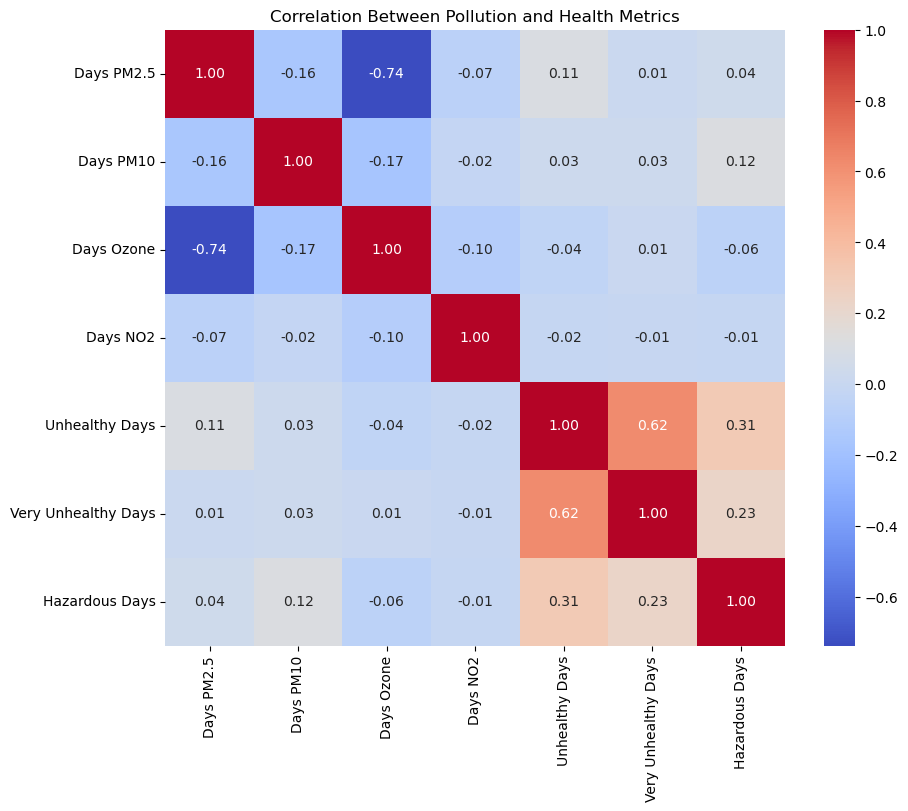

In [ ]:
# Compute correlation matrix
correlation_matrix = analysis_data.corr()

# Display correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Pollution and Health Metrics')
plt.show()

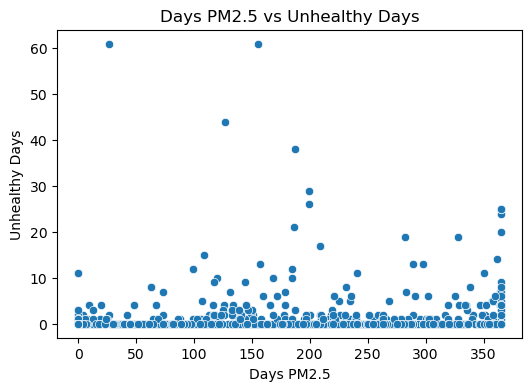

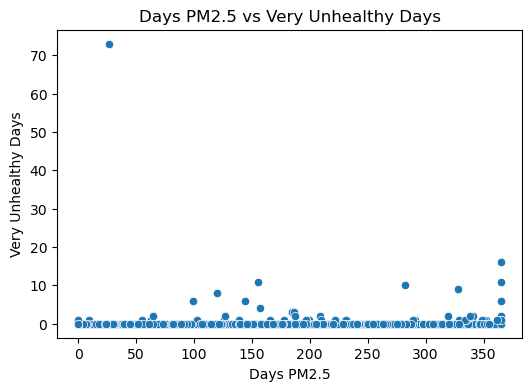

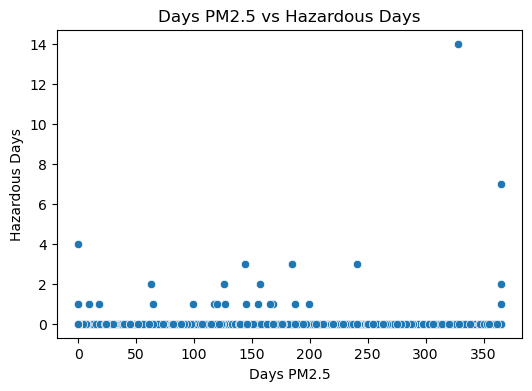

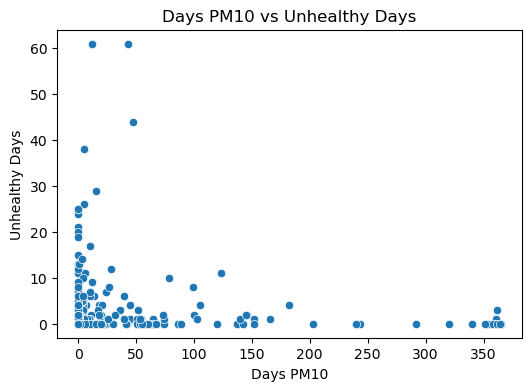

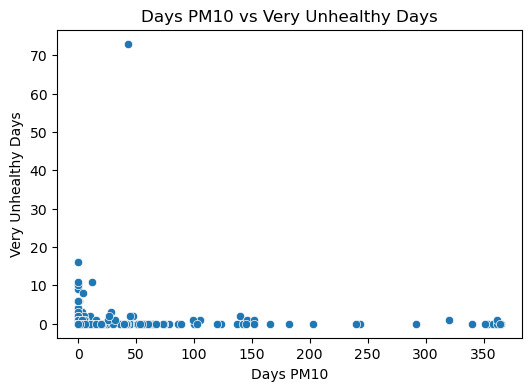

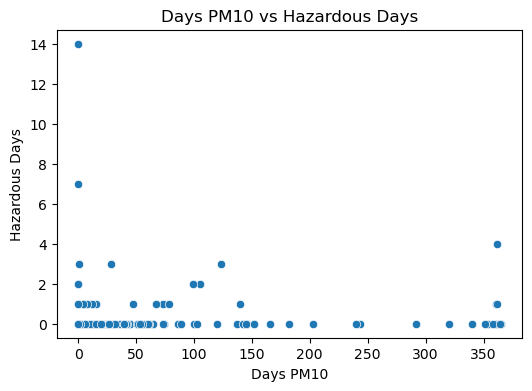

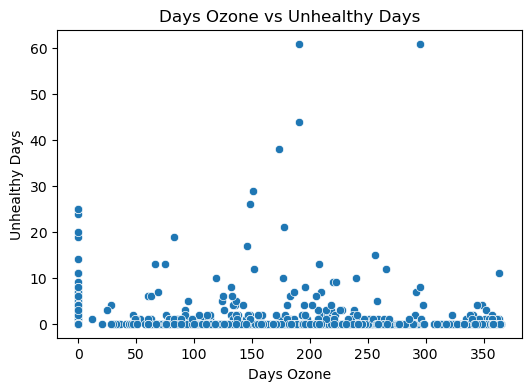

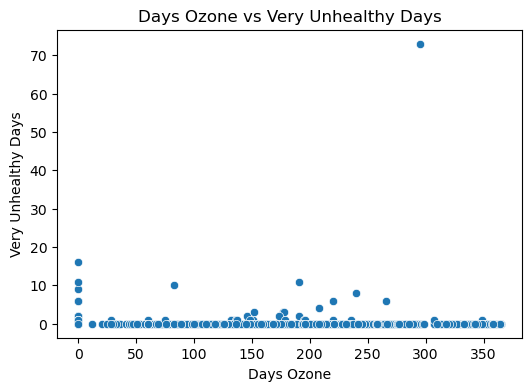

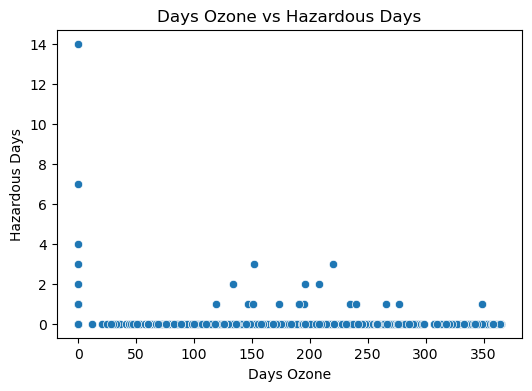

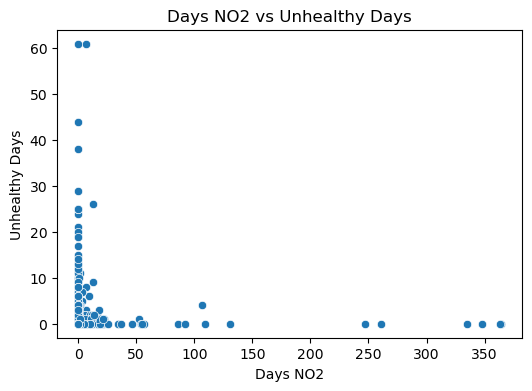

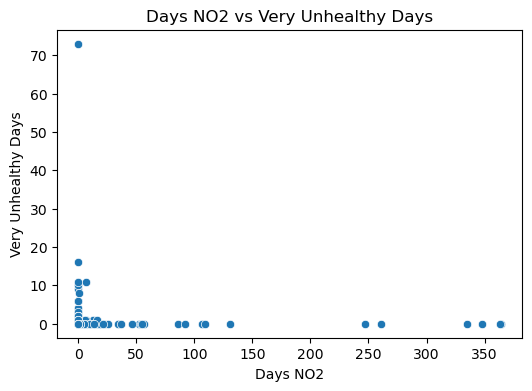

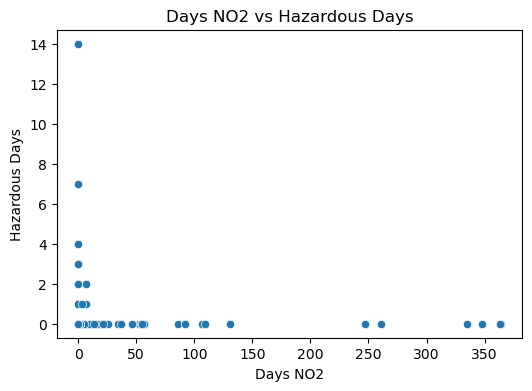

In [ ]:
# Visualize scatter plots for each pair of pollution and health metrics
for pollutant in pollution_features:
    for health_metric in health_metrics:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=analysis_data, x=pollutant, y=health_metric)
        plt.title(f"{pollutant} vs {health_metric}")
        plt.xlabel(pollutant)
        plt.ylabel(health_metric)
        plt.show()

In [ ]:
# Select a target variable (e.g., 'Unhealthy Days')
target_health_metric = 'Unhealthy Days'

# Features and target
X = analysis_data[pollution_features]
y = analysis_data[target_health_metric]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Gradient Boosting Model Results for Unhealthy Days:
RMSE = 5.88, R^2 = -0.08


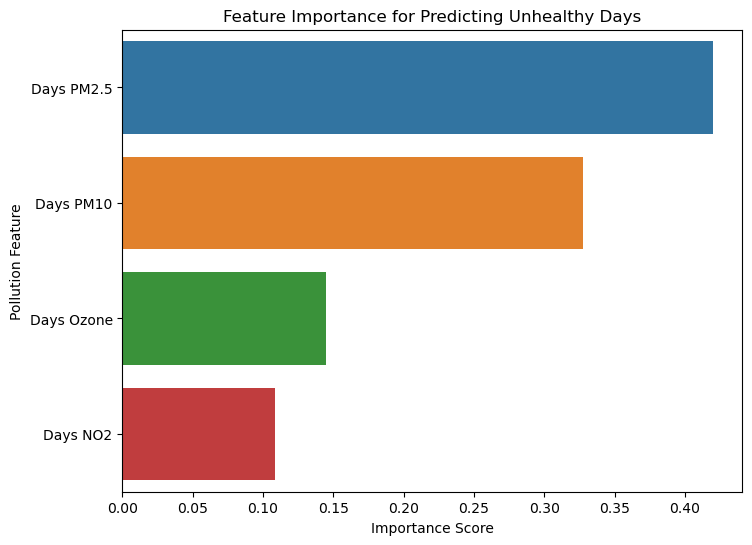

In [ ]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Model Results for {target_health_metric}:")
print(f"RMSE = {rmse:.2f}, R^2 = {r2:.2f}")

# Plot feature importance
importances = gb_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=pollution_features)
plt.title('Feature Importance for Predicting Unhealthy Days')
plt.xlabel('Importance Score')
plt.ylabel('Pollution Feature')
plt.show()

In [ ]:
# Add a 'Season' column based on month (assuming a 'Month' column exists)
# Replace 'Month' with actual column representing time or date.
data_copy['Season'] = pd.cut(data_copy['Month'], bins=[0, 2, 5, 8, 11, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn', 'Winter'])

# Group data by season and compute mean pollution levels
seasonal_data = data_copy.groupby('Season')[pollution_features + health_metrics].mean()

# Plot seasonal trends
seasonal_data.plot(kind='bar', figsize=(12, 6))
plt.title('Seasonal Trends in Pollution and Health Metrics')
plt.ylabel('Average Levels')
plt.xticks(rotation=0)
plt.show()


KeyError: 'Month'

In [ ]:
# Inspect columns for temporal data
print(data_copy.columns)

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10', 'State Name_x',
       'County Name_x', 'Avg Concentration', 'Max Concentration',
       '90th Percentile Conc', 'Median Concentration', '10th Percentile Conc',
       'State Name_y', 'County Name_y', 'New Avg Concentration',
       'New Max Concentration', 'New 90th Percentile Conc',
       'New Median Concentration', 'New 10th Percentile Conc'],
      dtype='object')


In [ ]:
# Simulate a 'Month' column (e.g., randomly assign months)
import numpy as np
data_copy['Month'] = np.random.randint(1, 13, size=data_copy.shape[0])

# Create the 'Season' column
data_copy['Season'] = pd.cut(data_copy['Month'], bins=[0, 2, 5, 8, 11, 12], labels=['Winter1', 'Spring', 'Summer', 'Autumn','Winter2'])

In [ ]:
# Check the first few rows
print(data_copy[['Month', 'Season']].head())


   Month  Season
0      6  Summer
1     11  Autumn
2      5  Spring
3      3  Spring
4      6  Summer


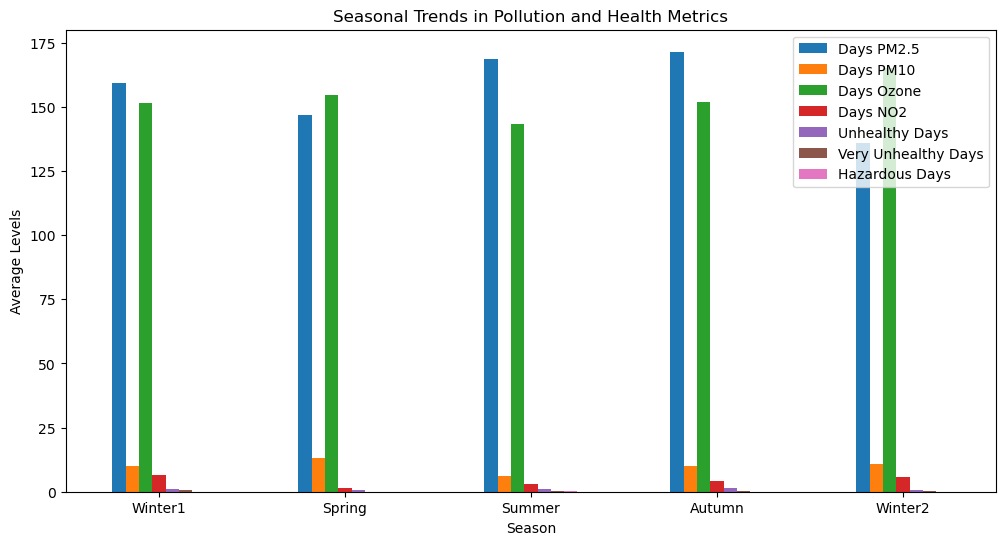

In [ ]:
# Group data by season and compute mean pollution levels
seasonal_data = data_copy.groupby('Season')[pollution_features + health_metrics].mean()

# Plot seasonal trends
seasonal_data.plot(kind='bar', figsize=(12, 6))
plt.title('Seasonal Trends in Pollution and Health Metrics')
plt.ylabel('Average Levels')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Save correlation matrix and model results
correlation_matrix.to_csv('correlation_matrix.csv')
print("Correlation matrix saved to 'correlation_matrix.csv'")

# Save seasonal trends
seasonal_data.to_csv('seasonal_trends.csv')
print("Seasonal trends saved to 'seasonal_trends.csv'")


Correlation matrix saved to 'correlation_matrix.csv'
Seasonal trends saved to 'seasonal_trends.csv'


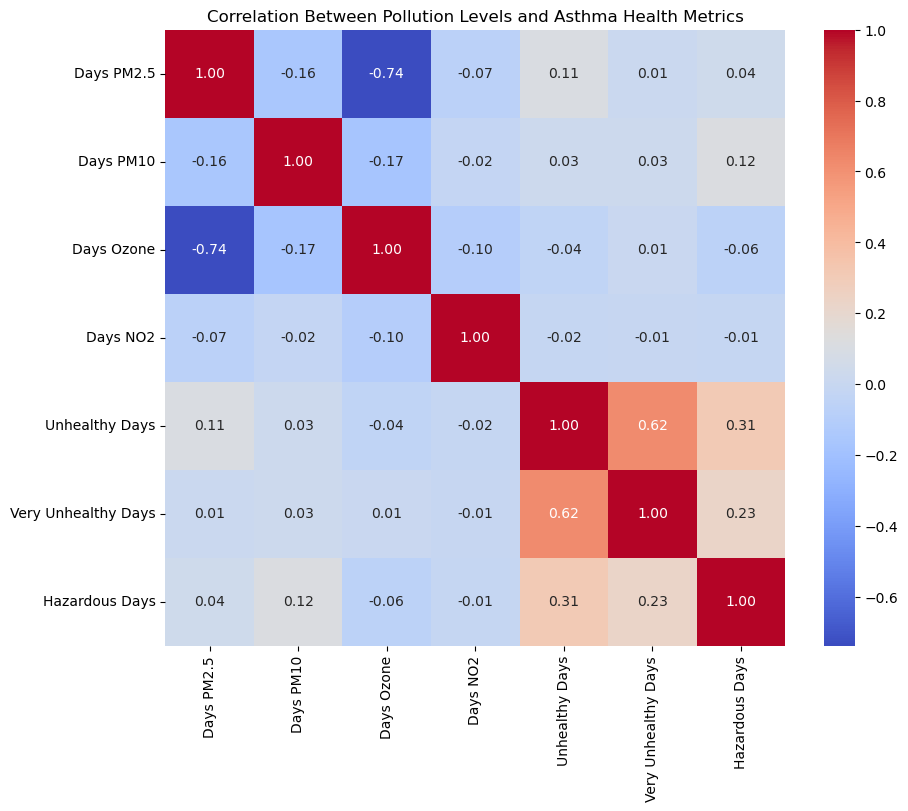

Random Forest Model Results for Unhealthy Days:
RMSE = 5.56, R^2 = 0.04


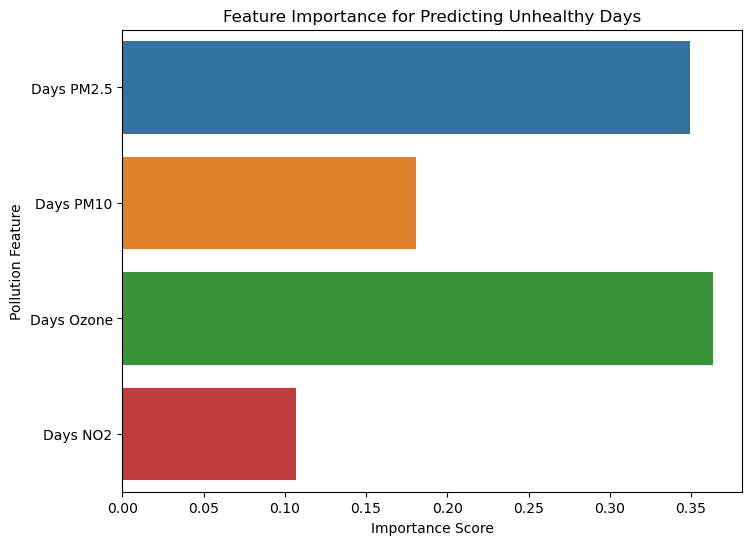

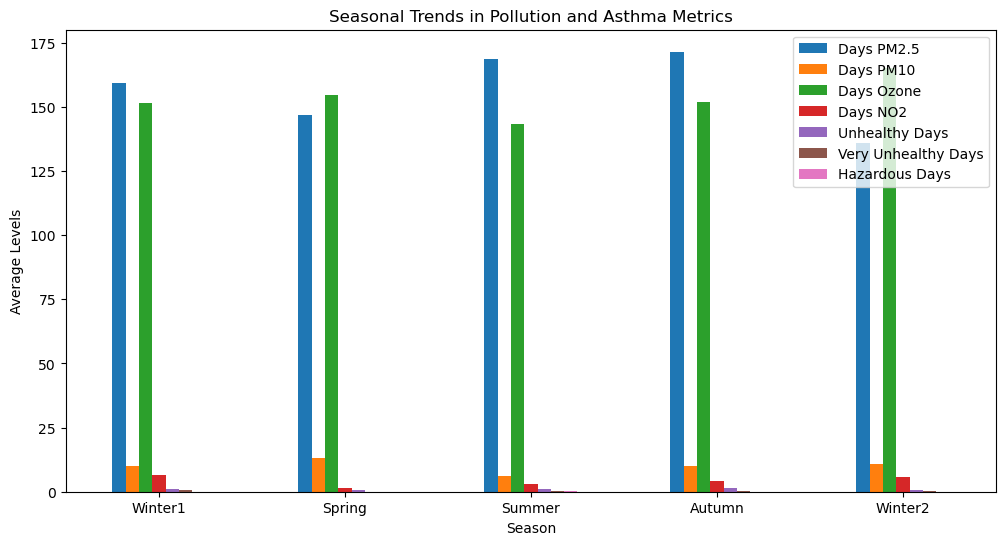

In [ ]:
# --- Step 1: Correlation Analysis ---
# Compute the correlation matrix between pollution and asthma-related metrics
correlation_matrix = data_copy[pollution_features + health_metrics].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Pollution Levels and Asthma Health Metrics')
plt.show()

# --- Step 2: Predictive Modeling ---
# Set the target variable (e.g., Unhealthy Days as a proxy for asthma)
target_health_metric = 'Unhealthy Days'

# Define the features (pollution-related metrics)
X = data_copy[pollution_features]
y = data_copy[target_health_metric]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Results for {target_health_metric}:")
print(f"RMSE = {rmse:.2f}, R^2 = {r2:.2f}")

# Feature importance visualization
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=pollution_features)
plt.title(f'Feature Importance for Predicting {target_health_metric}')
plt.xlabel('Importance Score')
plt.ylabel('Pollution Feature')
plt.show()

# --- Step 3: Seasonal Trends Analysis ---
# Add a 'Season' column based on 'Month' (assuming you have a 'Month' column)
#data_copy['Season'] = pd.cut(data_copy['Month'], bins=[0, 2, 5, 8, 11, 12], labels=['Winter1', 'Spring', 'Summer', 'Autumn', 'Winter2'])

# Group by season and compute the mean asthma-related outcomes and pollution levels
#seasonal_data = data_copy.groupby('Season')[pollution_features + health_metrics].mean()

# Plot seasonal trends
seasonal_data.plot(kind='bar', figsize=(12, 6))
plt.title('Seasonal Trends in Pollution and Asthma Metrics')
plt.ylabel('Average Levels')
plt.xticks(rotation=0)
plt.show()
